# COMPANY DATA ANALYSIS

In [1]:
#importing the packages--
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# reading the data file--
def read_data():
    data=pd.read_csv("rD:\Master in Data Science\Python\Projects\Random Forest Project 9 & 10\10. Random Forests/Company_Data.csv")
    return data

In [3]:
# calling the function--
data= read_data()
print(data.head(2))

   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  


In [4]:
# copying the data--
data.copy()
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
# data analysis--
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
data.shape

(400, 11)

# Exploratory Data Analysis

<Axes: >

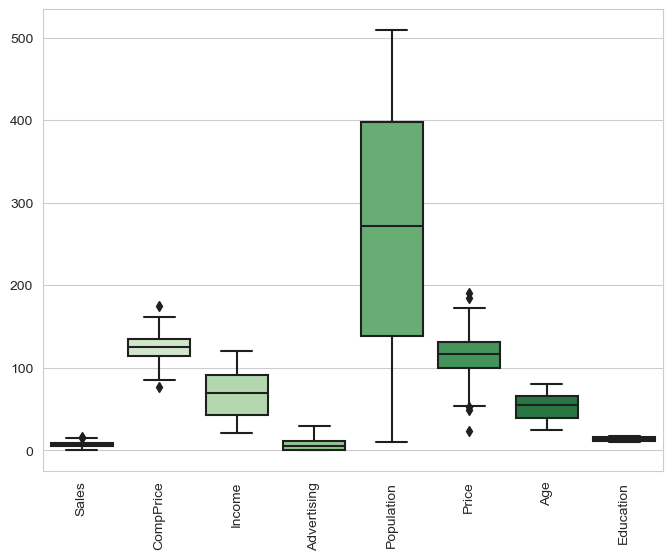

In [11]:
# checking the outliers--
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
plt.xticks(rotation=90,fontsize="medium")
sns.boxplot(data=data.loc[:, ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population',
       'Price', 'Age', 'Education',]],palette="Greens")

Text(0.5, 1.0, 'Advertising V/S Sales')

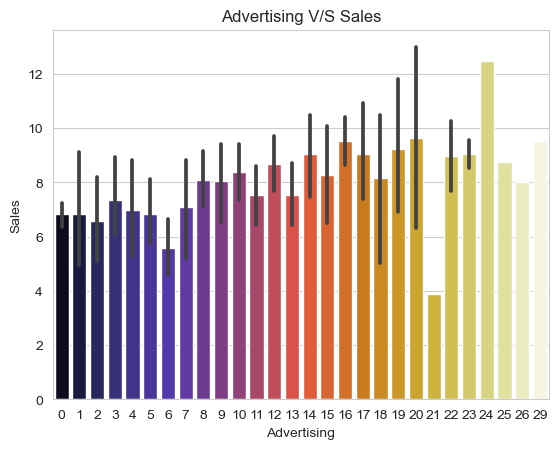

In [13]:
sns.barplot(x="Advertising",y="Sales",data=data,palette='CMRmap')
plt.title("Advertising V/S Sales")

Text(0.5, 1.0, 'Age V/S Income')

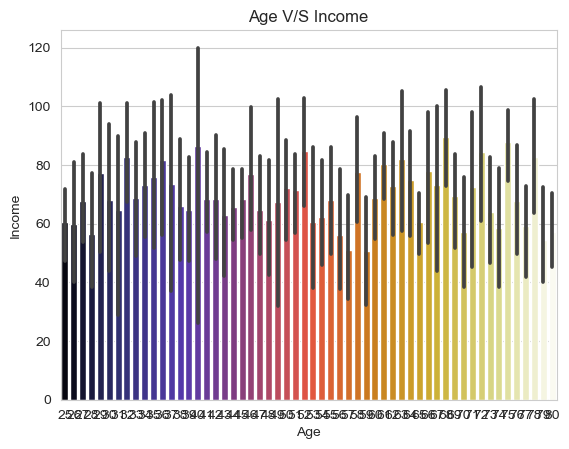

In [34]:
sns.barplot(x="Age",y="Income",data=data,palette='CMRmap')
plt.title("Age V/S Income")

Text(0.5, 1.0, 'Education V/S Income')

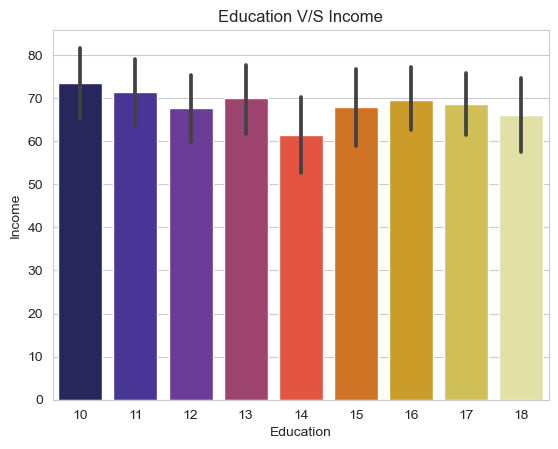

In [33]:
sns.barplot(x="Education",y="Income",data=data,palette='CMRmap')
plt.title("Education V/S Income")

Text(0.5, 1.0, 'Advertising V/S Price')

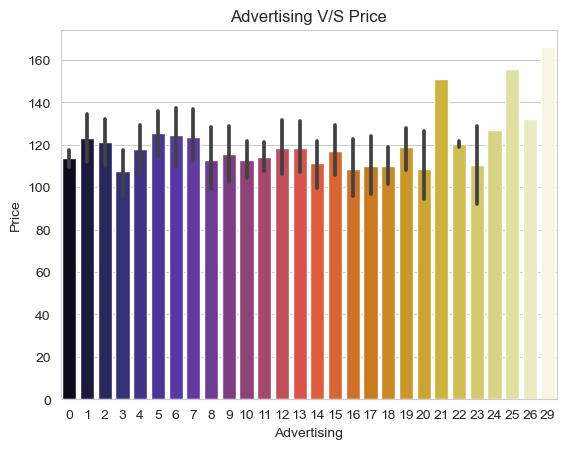

In [23]:
sns.barplot(x="Advertising",y="Price",data=data,palette='CMRmap')
plt.title("Advertising V/S Price")

Text(0.5, 1.0, 'Age V/S Population')

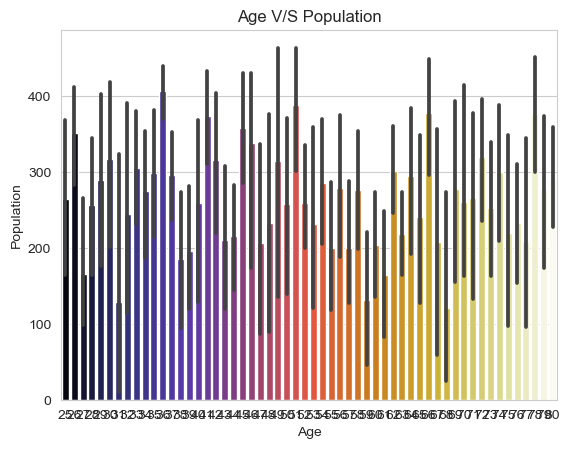

In [24]:
sns.barplot(x="Age",y="Population",data=data,palette='CMRmap')
plt.title("Age V/S Population")

Text(0.5, 1.0, 'Education V/S Population')

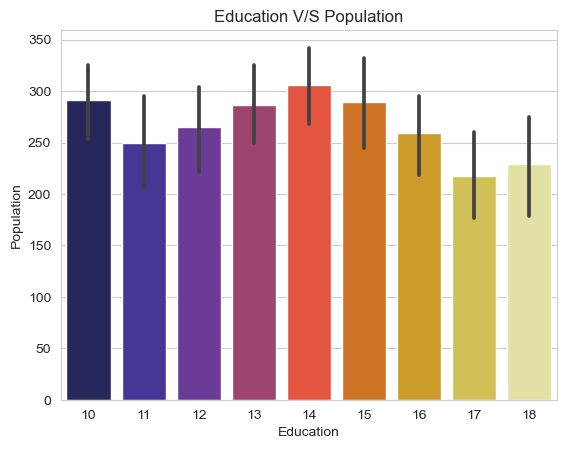

In [25]:
sns.barplot(x="Education",y="Population",data=data,palette='CMRmap')
plt.title("Education V/S Population")

Text(0.5, 1.0, 'Age V/S Education')

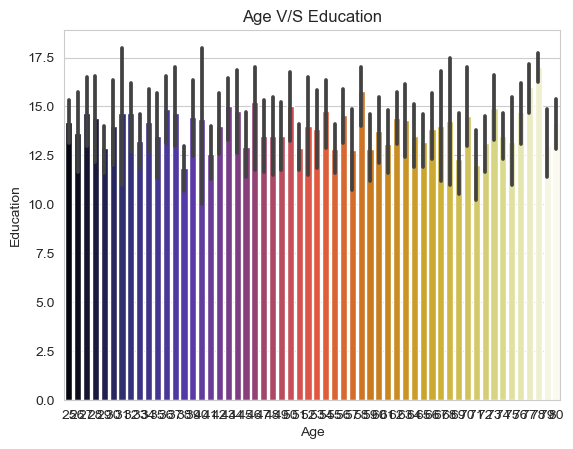

In [26]:
sns.barplot(x="Age",y="Education",data=data,palette='CMRmap')
plt.title("Age V/S Education")

Text(0.5, 1.0, 'Count of Sales')

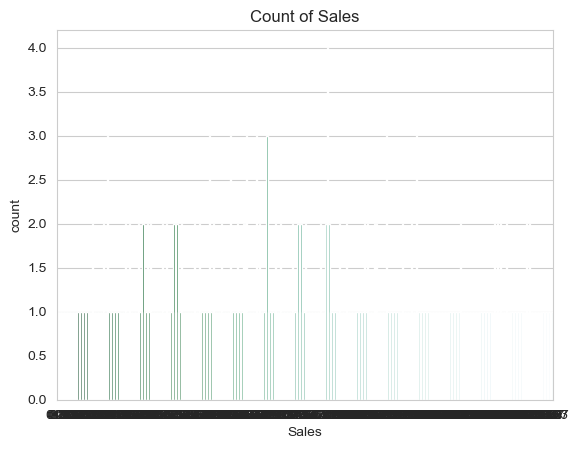

In [27]:
sns.countplot(x="Sales",data=data,palette='BuGn_r')
plt.title("Count of Sales")

Text(0.5, 1.0, 'Count of Population')

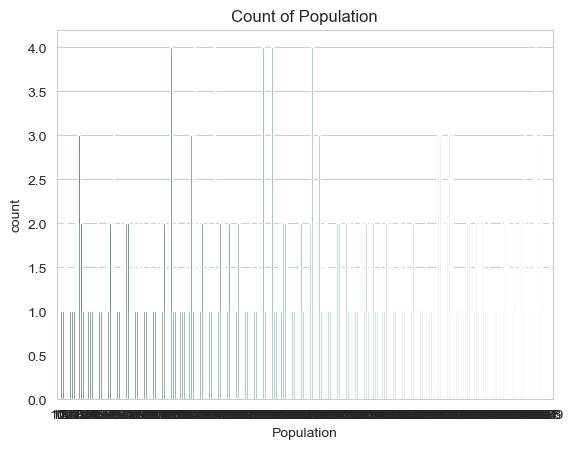

In [28]:
sns.countplot(x="Population",data=data,palette='BuGn_r')
plt.title("Count of Population")

Text(0.5, 1.0, 'Count of Age')

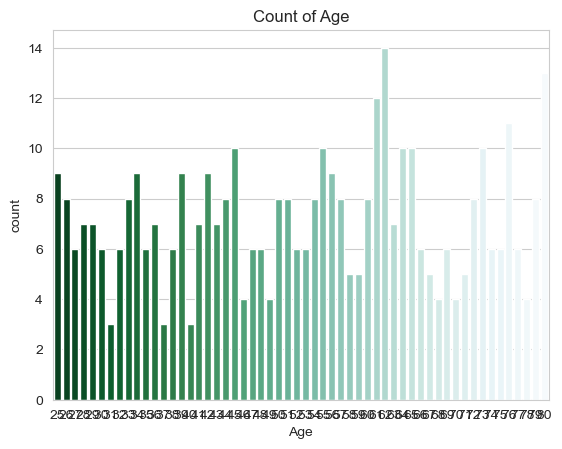

In [29]:
sns.countplot(x="Age",data=data,palette='BuGn_r')
plt.title("Count of Age")

Text(0.5, 1.0, 'Sales V/S Price')

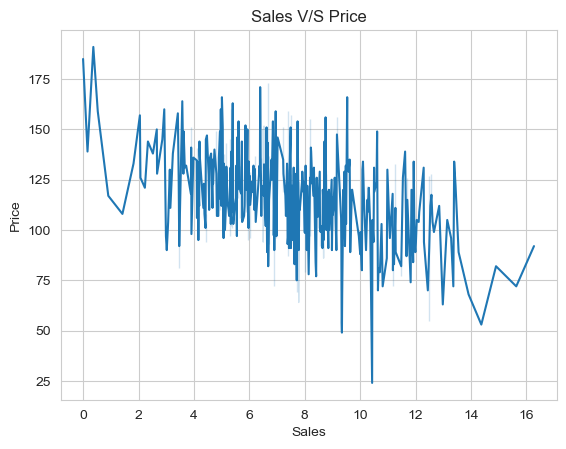

In [30]:
sns.lineplot(x="Sales",y=data["Price"],data=data)
plt.title("Sales V/S Price")

<Axes: >

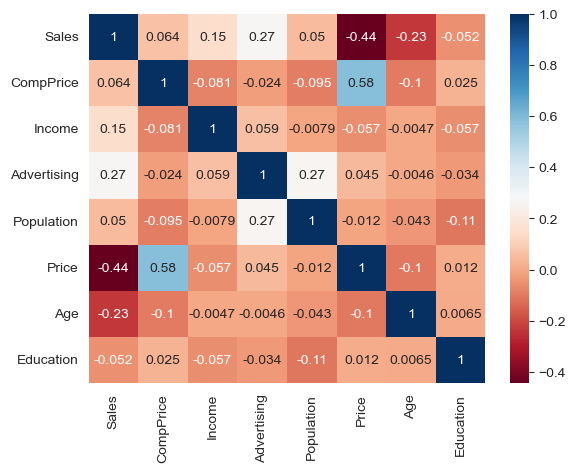

In [31]:
sns.heatmap(data [['Sales', 'CompPrice', 'Income', 'Advertising', 'Population','Price', 'Age', 'Education',]].corr(),annot=True,cmap="RdBu")

### Pre - processing & Label Encoding

In [9]:
label_encoder = preprocessing.LabelEncoder()

In [10]:
data["ShelveLoc"] = label_encoder.fit_transform(data["ShelveLoc"])
data["Urban"] = label_encoder.fit_transform(data["Urban"])
data["US"] = label_encoder.fit_transform(data["US"])

In [11]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [12]:
feature_cols=['CompPrice','Income','Advertising','Population','Price','ShelveLoc',
              'Age','Education','Urban','US']

In [13]:
data['High'] = data.Sales.map(lambda x: 1 if x>8 else 0)

In [14]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [15]:
x = data.drop(['Sales', 'High'], axis = 1)

In [18]:
x = data[feature_cols]
print(x)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  

In [19]:
y = data.High
print(y)

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64


In [20]:
# sampling of data--
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 40)

In [21]:
print(x_train)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
189        118     117           18         509    104          2   26   
396        139      23            3          37    120          2   55   
299        135      40           17         497     96          2   54   
347         96      39            0         161    112          1   27   
282        150      96            0          80    154          1   61   
..         ...     ...          ...         ...    ...        ...  ...   
306        131      32            1          85    133          2   48   
165        147      58            7         100    191          0   27   
7          136      81           15         425    120          1   67   
219        116      79           19         359    116          1   58   
326        133      30            0         152    122          2   53   

     Education  Urban  US  
189         15      0   1  
396         11      0   1  
299         17      0   1  

In [22]:
print(y_train)

189    1
396    0
299    1
347    0
282    0
      ..
306    0
165    0
7      1
219    1
326    0
Name: High, Length: 300, dtype: int64


In [23]:
print(x_test)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
132        125      87            9         232    136          1   72   
390        108      75            9          61    111          2   67   
310        175      65           29         419    166          2   53   
3          117     100            4         466     97          2   55   
248        111      52            0          12    101          2   61   
..         ...     ...          ...         ...    ...        ...  ...   
27          98     118            0          19    107          2   64   
183        118      74            6         426    102          2   80   
157        121      58            8         249     90          2   48   
129        143     120            7         279    147          0   40   
279        141      57           13         376    158          2   64   

     Education  Urban  US  
132         10      1   1  
390         12      1   1  
310         12      1   1  

In [24]:
print(y_test)

132    1
390    0
310    1
3      0
248    0
      ..
27     0
183    0
157    1
129    0
279    0
Name: High, Length: 100, dtype: int64


In [27]:
# feature scaling--
sc = StandardScaler()

In [28]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Random Forest Classifier

In [29]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 40)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=40)

In [30]:
classifier.score(x_test, y_test)

0.76

In [31]:
y_pred = classifier.predict(x_test)

In [32]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [37]:
cm = confusion_matrix(y_test, y_pred)

In [38]:
print(cm)

[[56 10]
 [14 20]]


In [39]:
accuracy_score(y_test, y_pred)

0.76

In [34]:
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [35]:
classifier.score(x_test, y_test)

0.89